# Introduction to Problem and Business Case For Telecom Customer Churn Prediction

This project involves predicting the customer churn rate of a telecommunication company. This is important analysis to conduct as Telecom companies would use results from customer attrition analysis as a key business metric. Understanding this metric helps give an estimate of the cost of retaining existing customers, which usually is cost much less than acquiring a new one. 

In this scenario, Machine Learning (ML) algorithms can help analyze the customer attrition rate. I used several ML models to demonstrate and evaluate which ML model would perform better in this business case.

For this project, I used the dataset which can also be found on Kaggle (https://www.kaggle.com/blastchar/telco-customer-churn)

##  Import Libraies and Dataset

In [1]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly

     |████████████████████████████████| 81 kB 5.5 MB/s eta 0:00:011
     |████████████████████████████████| 26.5 MB 560 kB/s eta 0:00:01


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67922 sha256=f710d76283adafc4b452566d5af4fe48c2f7d6b82ac3035d2e21e4196ec17ab6
  Stored in directory: /Users/nchan94/Library/Caches/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [3]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 2.2 MB/s eta 0:00:01


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline() 
init_notebook_mode(connected=True)
from jupyterthemes import jtplot
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [5]:
# Load the dataset CSV file 
telecom_df = pd.read_csv("telecom_churn.csv")

In [6]:
# Load the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
# Check the shape of the dataframe
telecom_df.shape

(5000, 21)

In [9]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [10]:
# Obtain a summary of the dataframe
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

## Exploratory Analysis and Data Visualization

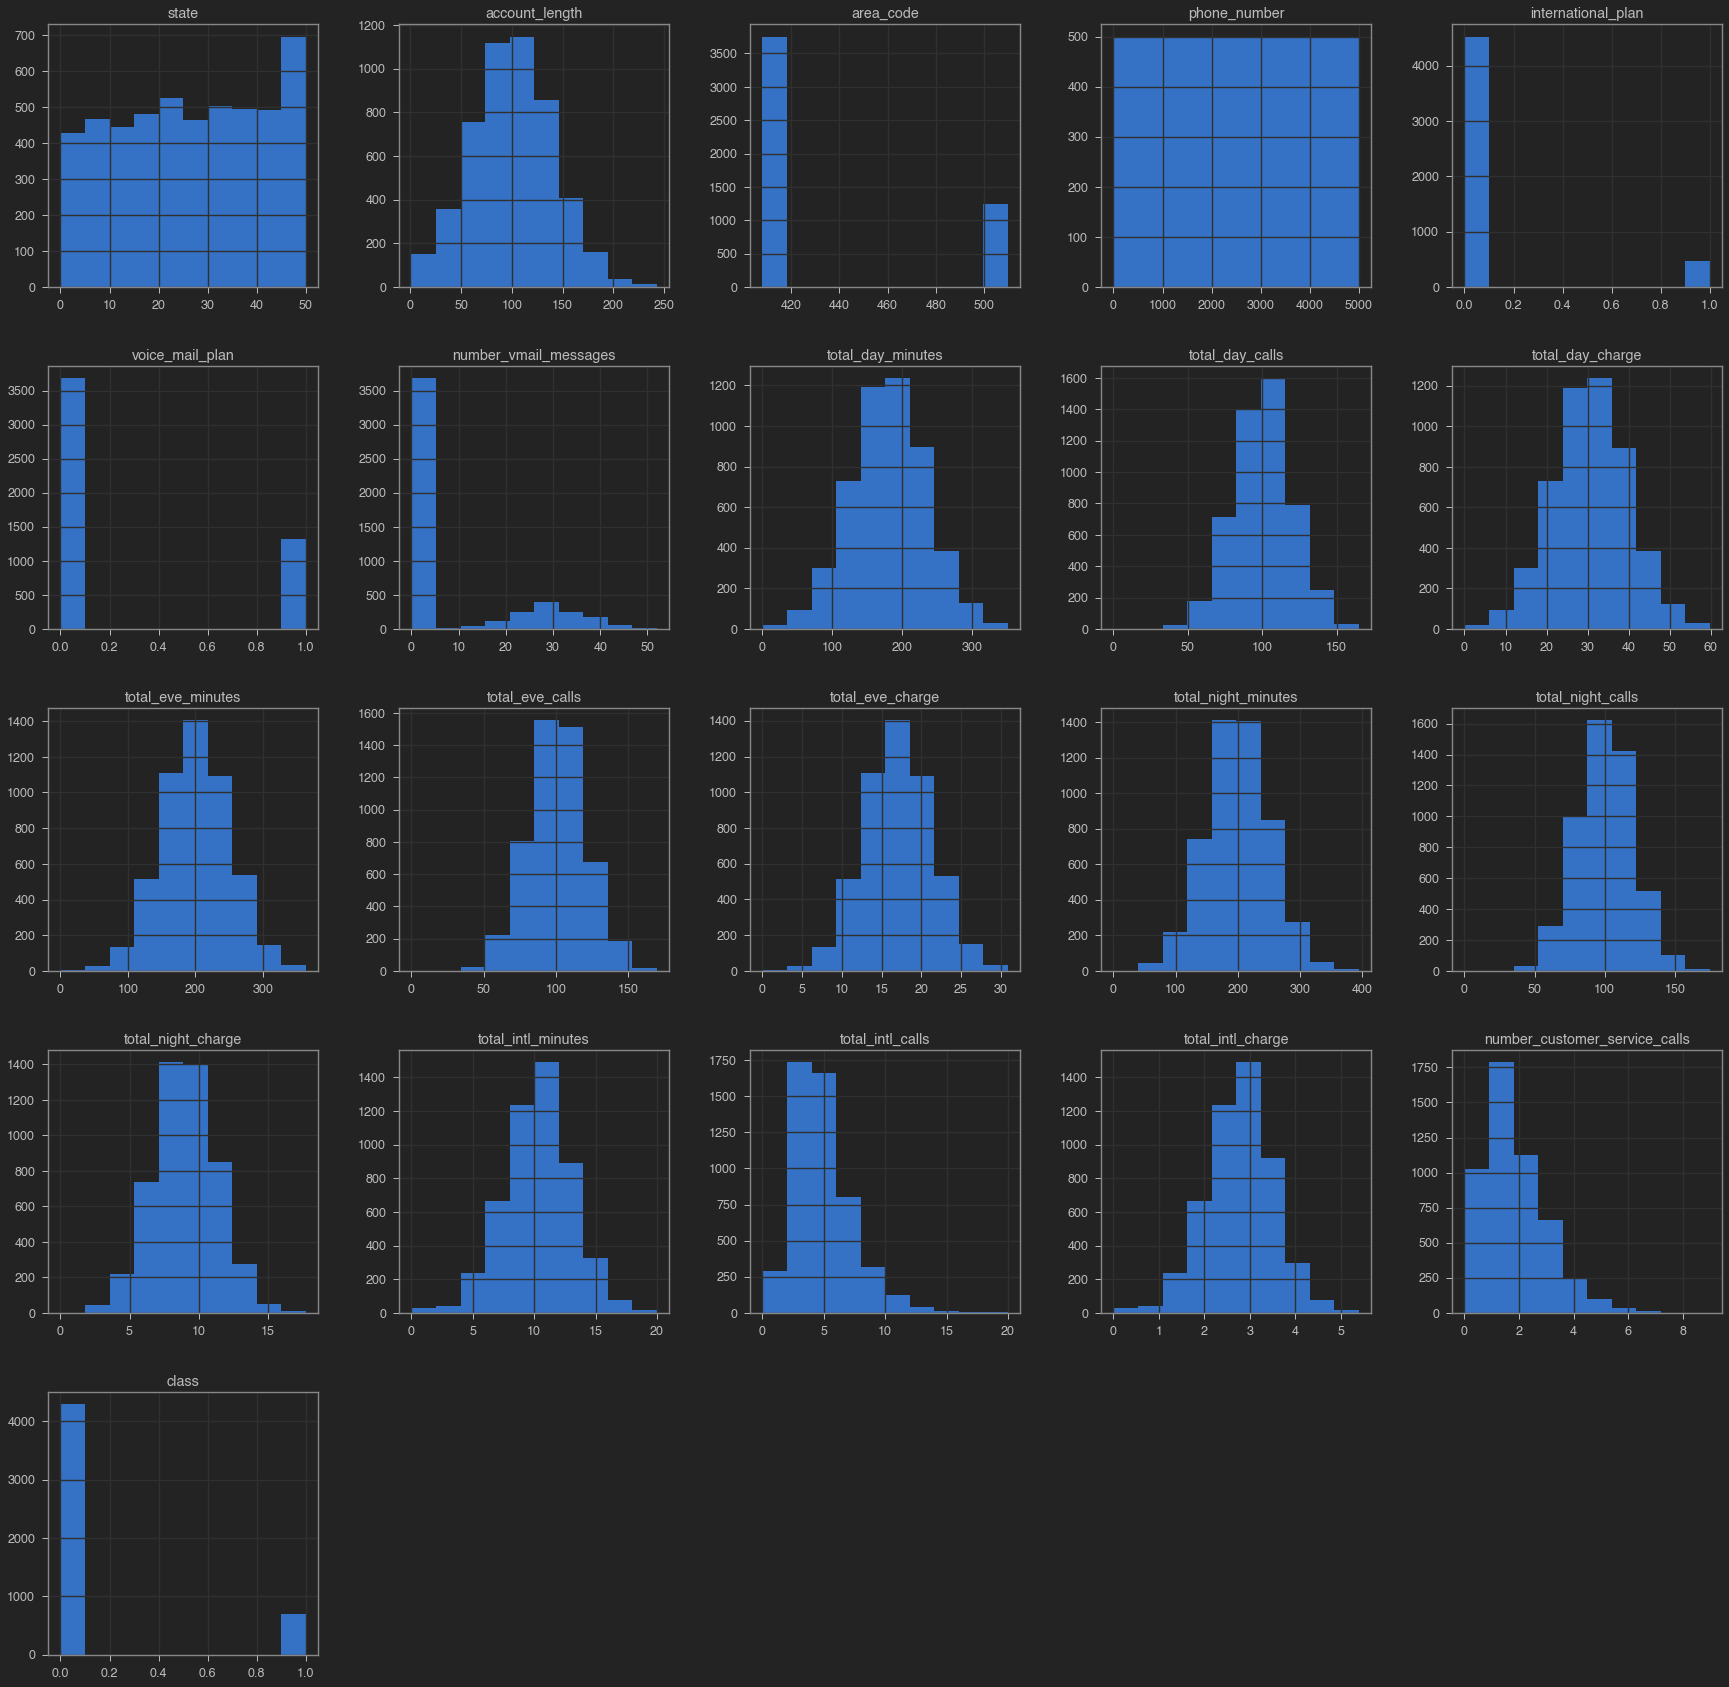

In [11]:
telecom_df.hist(figsize=(30,30))
plt.show()

In [13]:
#Check the labels. How many customers retained, and how many left?
telecom_df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [14]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning

import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = ['Retained (0)','Exited (1)'],
                               values = telecom_df['class'].value_counts())])
fig.show()

In [15]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(telecom_df, x = 'international_plan', color = 'class')
fig.show()


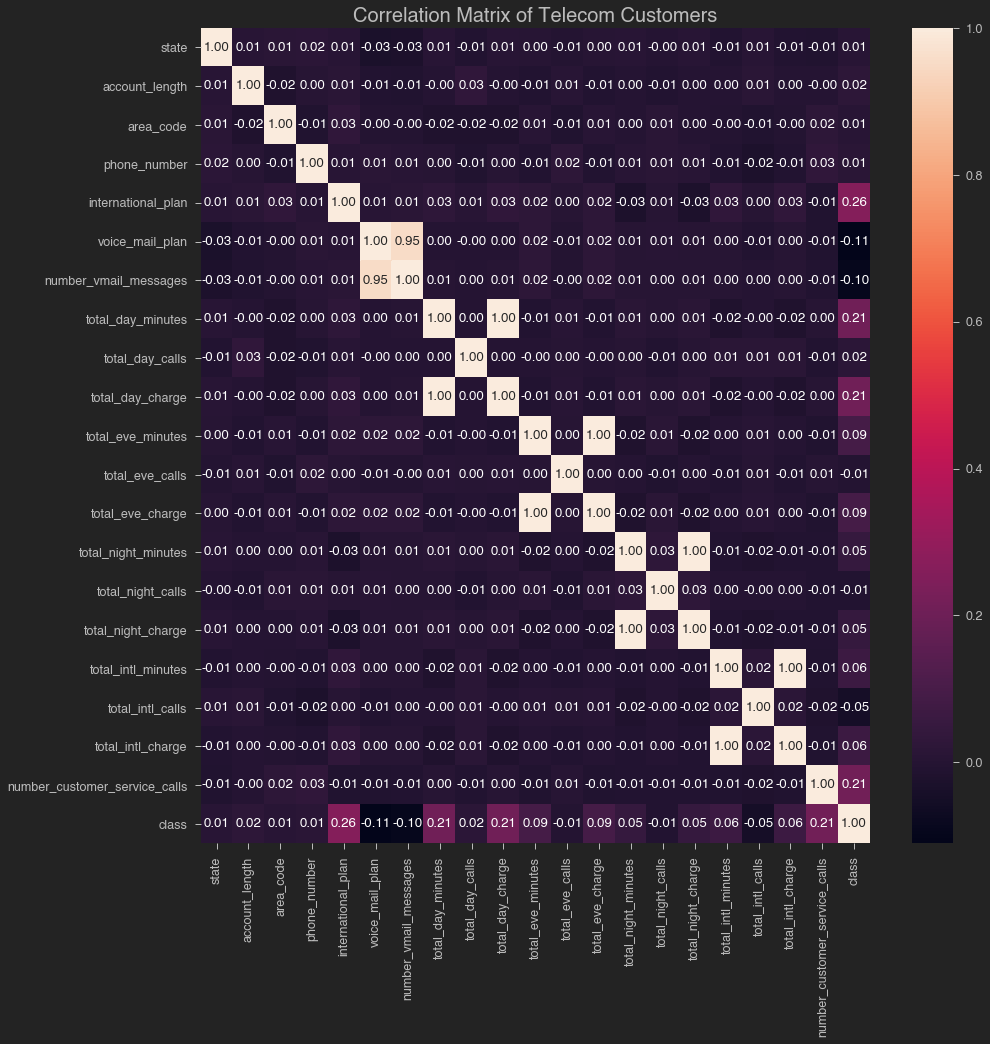

In [16]:
# Correlation Matrix to see the relationship between features in our dataset

corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

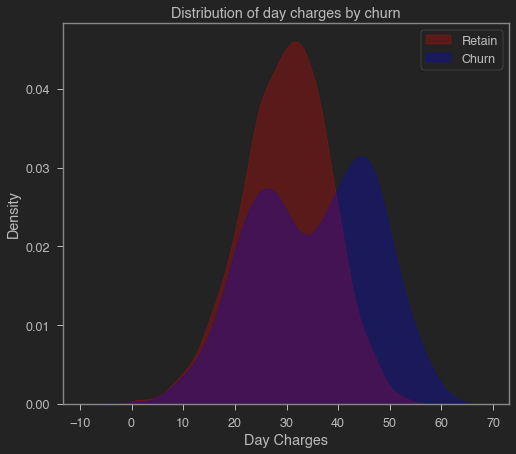

In [17]:
# Lets visualize the data of the Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

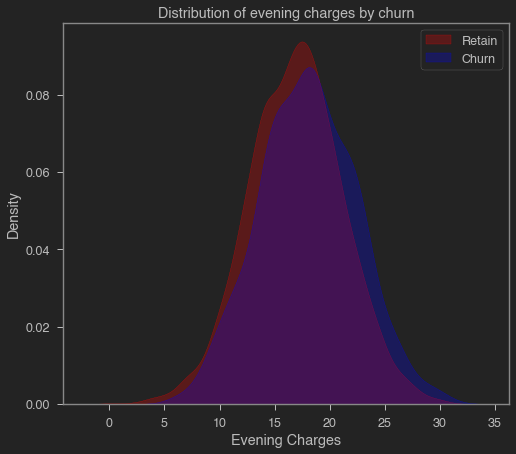

In [18]:
# Lets visualize the data of the Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

## Identify Which Features Are Important Before We Build ML Model

In [20]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [21]:
X.shape

(5000, 18)

In [22]:
y.shape

(5000,)

In [24]:
# Perform train/test split with 20% testing size
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [29]:
#Quickly check which features would be important moving forward

#Very good strategy to use RandomForestClassifier to check feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train.values.ravel())



RandomForestClassifier()

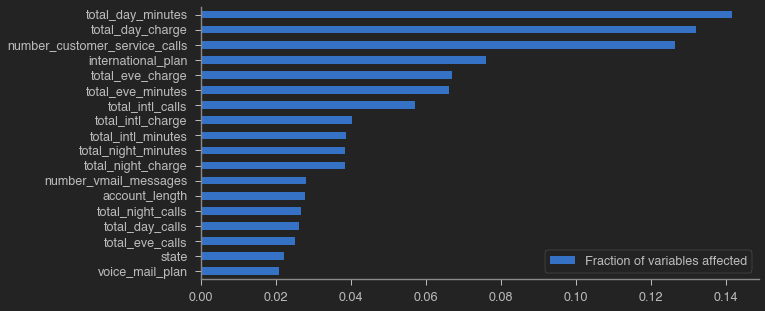

In [30]:
# Plot the feature importance and sort with the highest to lowest importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

## Train and Evaluate ML Model: LOGISTIC REGRESSION

Logistic Regressions are commonly used to predict binary outputs, or having an output range from 0 to 1. When using Logistic Regression, it makes its estimates using Maximum Likelihood Estimation (MLE). Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. This set of parameters can be used for predicting the data needed in a normal distribution.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/Users/nchan94/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [34]:
y_predict = model_LR.predict(X_test)

In [35]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       874
           1       0.52      0.13      0.21       126

    accuracy                           0.88      1000
   macro avg       0.70      0.56      0.57      1000
weighted avg       0.84      0.88      0.84      1000



<AxesSubplot:>

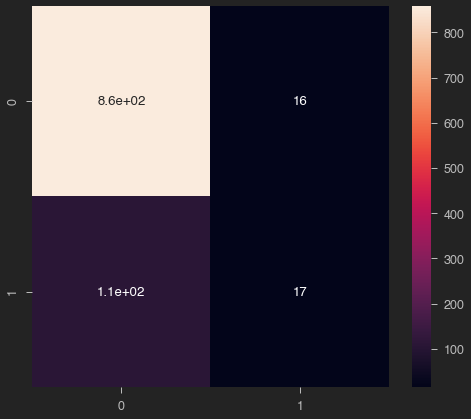

In [36]:
#Print out the Confusion Matrix

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True)

## Train and Evaluate ML Model: Support Vector Machine Classifier

In [45]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter=10000) #increased number of iterations
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

/Users/nchan94/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/nchan94/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/nchan94/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/nchan94/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/nchan94/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [46]:
y_predict = model_svm.predict(X_test)

In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       874
           1       0.59      0.18      0.28       126

    accuracy                           0.88      1000
   macro avg       0.74      0.58      0.61      1000
weighted avg       0.85      0.88      0.85      1000



<AxesSubplot:>

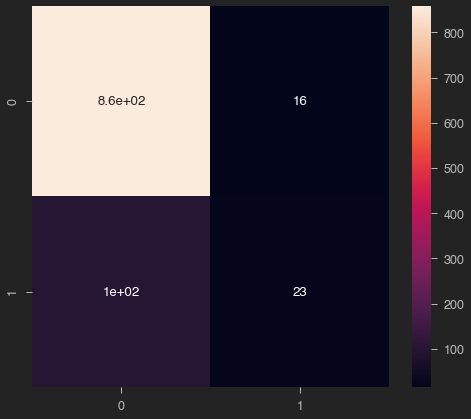

In [48]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True)

## Train and Evaluate ML Model: Random Forest Classifier

Random Forest Classifier is a type of ensemble algorithm. It creates a large set of decision trees and combines the votes from different decision trees to decide the final class of the test object. This helps overcome the issues with a single decision tree by reducing the effects of noise. It also helps overcome the 'overfitting problem' found in Decision Trees by taking the average of all the predictions, thereby canceling out bias.

An analogy of this method is combining the votes from a pool of exerts, each bringing in their own expertise and knowledge in a result of achieving a better outcome. 

In [50]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_predict = model_rf.predict(X_test)

In [52]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       874
           1       0.92      0.78      0.84       126

    accuracy                           0.96      1000
   macro avg       0.95      0.88      0.91      1000
weighted avg       0.96      0.96      0.96      1000



<AxesSubplot:>

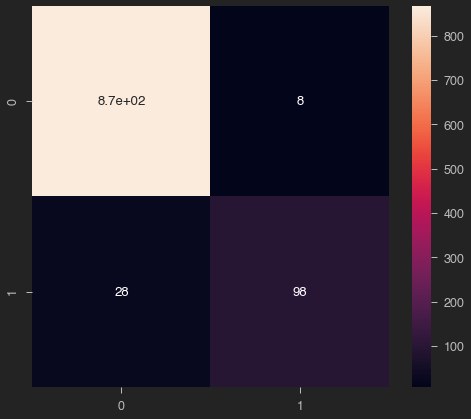

In [53]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True)

## Train and Evaluate ML Model: K-Nearnest Neighbors (KNN)

KNN is a classification algorithm that works by finding the most similar datapoitns in the training data in order to make an educated guess based on their classifications.

First, we need to select the value of k (e.g. 1,2,3..). Next, it will calculate the Euclidian distance between the point to be classified and every other point in the training data set, then it will pick the K closest data point (i.e. points with the k smallest distance. It will then run a majority vote among the selected data points, with the majority classification being the chosen classification. 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_predict = model_knn.predict(X_test)

In [56]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       874
           1       0.72      0.35      0.47       126

    accuracy                           0.90      1000
   macro avg       0.82      0.66      0.71      1000
weighted avg       0.89      0.90      0.89      1000



<AxesSubplot:>

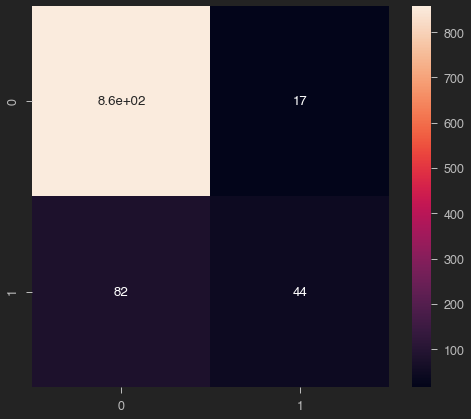

In [57]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True)

## Train and Evaluate ML Model: Naive Bayes Classifier

The Naive Bayesian (NB) classifier is based on Bayes’ theorem with the independence assumptions between predictors. NB provides a way of calculating the posterior probability, P(c|x), from P(c), P(x), and P(x|c). It assumes that the effect of the value of a predictor (x) on a given class (c) is independent of the values of other predictors. This assumption is called class conditional independence.


In [62]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)

GaussianNB()

In [63]:
y_predict = model_gnb.predict(X_test)

In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       874
           1       0.56      0.66      0.60       126

    accuracy                           0.89      1000
   macro avg       0.75      0.79      0.77      1000
weighted avg       0.90      0.89      0.89      1000



<AxesSubplot:>

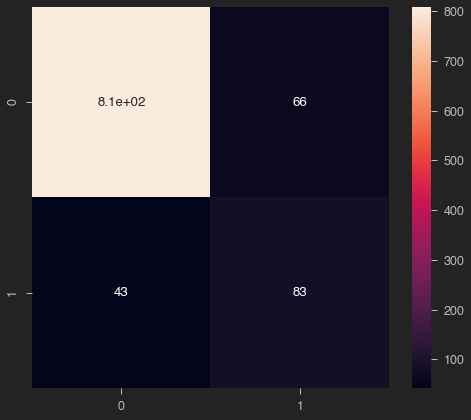

In [65]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

## Evaluating Models with ROC and AUC Scores

Recevier Operating Characteristic Curve (ROC): A metric that assesses the model's ability to distinguish between binary classes. It is plotted based on the true positive rate against the false positive rate at various threshold settings. Points above the diagonal line is considered a good classification (i.e. better than random).

Area Under Curve (AUC): Calculated the area under the ROC curve. Higher the AUC score, the better the model is predicting the binary outputs. 

More info: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


In [66]:
model_LR.predict_proba(X_test)

#Left column is probabiliy it is zero, and the right column is probability it is 1 (rememeber binary classification)

array([[0.89505315, 0.10494685],
       [0.83486906, 0.16513094],
       [0.91836264, 0.08163736],
       ...,
       [0.73503748, 0.26496252],
       [0.68648515, 0.31351485],
       [0.84033272, 0.15966728]])

In [67]:
model_LR.predict_proba(X_test)[:, 1] #only obtain the second column, the probability that the output is classified as '1'

array([0.10494685, 0.16513094, 0.08163736, 0.11927024, 0.1053532 ,
       0.14115115, 0.1529741 , 0.05142955, 0.09106569, 0.11317978,
       0.12229085, 0.20820773, 0.08542337, 0.09183938, 0.09491545,
       0.1264631 , 0.14545358, 0.23799893, 0.01449306, 0.02396336,
       0.26078057, 0.18144383, 0.01642453, 0.01617915, 0.33772861,
       0.40302042, 0.09970887, 0.04164372, 0.15260971, 0.11100059,
       0.14913389, 0.22405365, 0.02500037, 0.19056588, 0.66405391,
       0.1392303 , 0.44436744, 0.33124177, 0.21524498, 0.30032767,
       0.14246022, 0.13913211, 0.13078677, 0.16773646, 0.31881049,
       0.05511402, 0.19273794, 0.04714879, 0.08238219, 0.03385315,
       0.06267026, 0.10457486, 0.1366869 , 0.08198718, 0.01461576,
       0.09761697, 0.02584386, 0.15063878, 0.0395221 , 0.04448567,
       0.09893136, 0.2565171 , 0.08307258, 0.55165244, 0.02493818,
       0.36502422, 0.09212064, 0.0192832 , 0.08422405, 0.25359334,
       0.09939505, 0.1031943 , 0.18212368, 0.07909391, 0.13652

In [68]:
y_test

2913    0
3603    0
4341    0
2417    0
2132    0
       ..
2592    0
1082    0
1535    0
3086    0
4451    0
Name: class, Length: 1000, dtype: int64

In [70]:
from sklearn.metrics import roc_curve


fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [74]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [75]:
# AUC scor, Area under the curve

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7660818713450295
Support Vector Machine:  0.8524481493589045
Random Forest:  0.9336157422541862
K-Nearest Neighbors:  0.6918473720533217
Naive Bayes:  0.8708092695506884


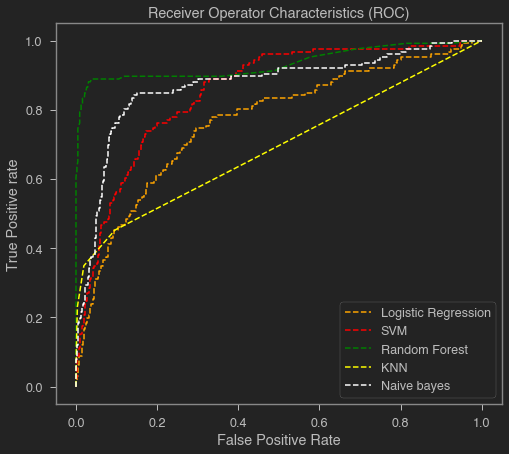

In [76]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

## Conclusion

The above graph shows that Random Forest algorithm produced the best AUC score. Therefore, it is clear that Random Forest model did a better job of classifying which telecom customer was churned or retained.

## Evaluating Random Forest With Classification Report

In [77]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       874
           1       0.92      0.78      0.84       126

    accuracy                           0.96      1000
   macro avg       0.95      0.88      0.91      1000
weighted avg       0.96      0.96      0.96      1000



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers